iter  0  shoot point, target 1.066666666725682
iter  1  shoot point, target 0.9333333333849596
iter  2  shoot point, target 1.0000000000553098
iter  3  shoot point, target 0.9666666667201277
iter  4  shoot point, target 0.9833333333877328
iter  5  shoot point, target 0.9916666667215209
iter  6  shoot point, target 0.9958333333884153
iter  7  shoot point, target 0.9979166667218614
iter  8  shoot point, target 0.9989583333885909
iter  9  shoot point, target 0.9994791667219575
iter  10  shoot point, target 0.9997395833886364
iter  11  shoot point, target 0.9998697917219651
iter  12  shoot point, target 0.9999348958886568
iter  13  shoot point, target 0.9999674479719792
iter  14  shoot point, target 0.9999837240136403
iter  15  shoot point, target 0.9999918620344727
iter  16  shoot point, target 0.9999959310449014
iter  17  shoot point, target 0.9999979655501144
iter  18  shoot point, target 0.9999989828027005
iter  19  shoot point, target 0.999999491429011
iter  20  shoot point, target 0.

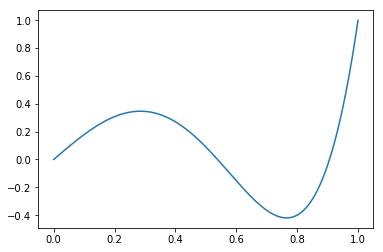

In [2]:
import numpy as np
import matplotlib.pyplot as plt

tend=1 #The goal
h=1.e-4 #reasonable step size
n=5 #the degree of the legendre polynomial
t=0

def rk4(t, h, y, n): #the implementation of the RK4 method. This calculates the new y and y' values.
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

def f(t, y): #the implementation of the polynomial function.
    f=np.zeros(2)
    f[0]=y[1]
    f[1]=(1/(1-t*t))*(2*t*y[1]-(n*(n+1)*y[0]))
    return f


maxiter=100
vymin=1.5 #first two guesses for the y value. Will use bisection method to narrow it down
vymax=2.5
for i in range (maxiter):
    vy=(vymin+vymax)/2. #bisection method
    y=[0., vy]
    t=0.
    yp=[] #the y axis
    tp=[] #the abscissa time axis
    while(t<tend): 
        if(t+h>tend): #makes sure the very last t value doesn't force a 1/0 calculation
            break
        y = rk4(t,h,y,2)
        yp=np.append(yp,y[0])
        tp=np.append(tp,t)
        t = t+h
    if(np.abs(y[0]-1.)<(10.e-15)): #keeps going until a 10e-15 error
        print('error is',np.abs(y[0]-1.))
        break
    if y[0]>1:
        vymax=(vymax+vymin)/2.
    else:
        vymin=(vymax+vymin)/2.
    print("iter ",i, " shoot point, target",y[0],)

plt.plot(tp,yp)
plt.show()